# 학습/테스트 데이터셋 분리
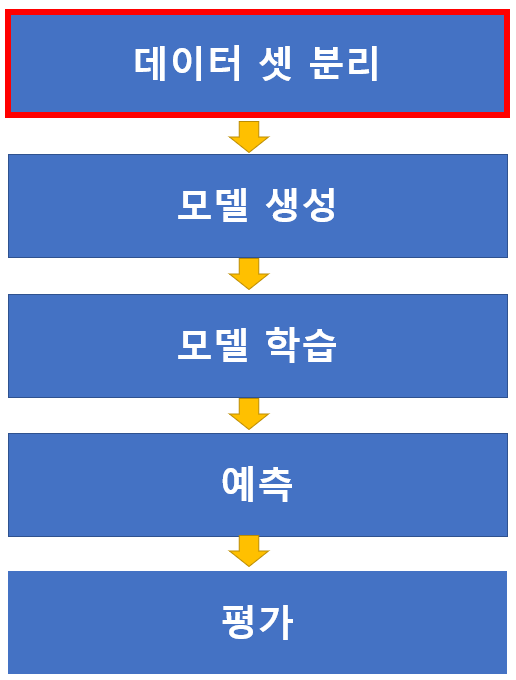

# 데이터셋(Dataset)
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - Train set으로 학습한 모델의 성능을 측정하기 위한 데이터셋
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용되야 한다.**
        - 학습과 평가를 반복하다 보면 모델이 검증때 사용한 데이터셋에 과적합되어 새로운 데이터에 대한 성능이 떨어진다.    
          그래서 데이터셋을 train 세트, validation 세터, test 세트로 나눠 train 세트와 validation 세트로 모델을 최적화 한 뒤 마지막에 test 세트로 최종 평가를 한다.

# Hold Out - Data분리 방식 1
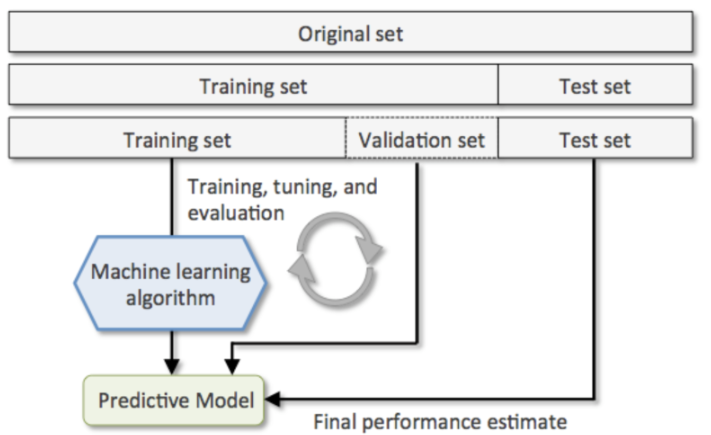

- 데이터셋을 Train set, Validation set, Test set으로 나눈다.
- sklearn.model_selection.train_test_split()  함수 사용

## Train/Test set 분리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris_data = load_iris()

X_train, X_test,y_train, y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=12)#stratify=y, 

dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

## Train/Validation/Test set 분리

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_data = load_iris()

X_train, X_test,y_train, y_test= train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape, X_validation.shape, X_test.shape)

dt_clf = DecisionTreeClassifier(max_depth=5)

dt_clf.fit(X_train, y_train)

val_pred = dt_clf.predict(X_validation)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_validation, val_pred)))

In [ ]:
test_pred = dt_clf.predict(X_test)
accuracy_score(y_test, test_pred)

## Hold out 방식의 단점
- train/test 셋이 어떻게 나눠 지냐에 따라 결과가 달라진다.
    - 데이터가 충분히 많을때는 변동성이 흡수되 괜찮으나 수천건 정도로 적을 때는 문제가 발생할 수 있다.
- 데이테셋의 양이 적을 경우 학습을 위한 데이터 양이 너무 적어 학습이 제대로 안될 수 있다.
    - 다양한 패턴을 찾을 수가 없기 때문에 새로운 데이터에 대한 예측 성능이 떨어지게 된다.
- **Hold out 방식은 (다양한 패턴을 가진) 데이터의 양이 많을 경우에 사용한다.**

# K-겹 교차검증 (K-Fold Cross Validation) - Data분리 방식 2
1. 데이터셋을 설정한 K 개로 나눈다.
1. K개 중 하나를 검증세트로 나머지를 훈련세트로 하여 모델을 학습시키고 평가한다. 
1. K개 모두가 한번씩 검증세트가 되도록 K번 반복하여 모델을 학습시킨 뒤 나온 평가지표들을 평균내서 모델의 성능을 평가한다.

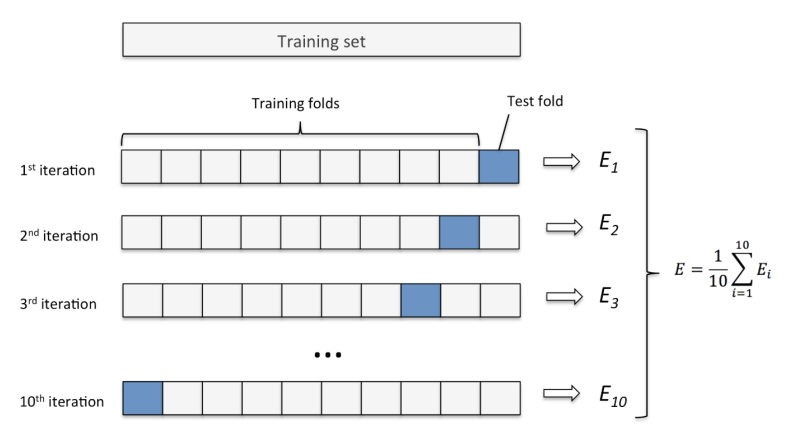

- 데이터양이 충분치 않을때 사용한다.
- 보통 Fold를 나눌때 2.5:7.5 또는 2:8 비율이 되게 하기 위해 4개 또는 5개 fold로 나눈다. 
- 종류
    - **KFold**
        - 회귀문제의 Dataset을 분리할 때 사용
    - **StratifiedKFold**
        - 분류분제의 Dataset을 분리할 때 사용

## KFold
- 지정한 개수(K)만큼 분할한다.
- Raw dataset의 순서를 유지하면서 지정한 개수로 분할한다.
- 회귀 문제일때 사용한다.
- KFold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- KFold객체.split(데이터셋)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 **index**들을 반환하는 generator 생성 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X,y = load_iris(return_X_y=True)

kfold = KFold(n_splits=3)

In [ ]:
ex = kfold.split(X)
print(type(ex))
# next(ex)

In [ ]:
next(ex)

In [ ]:
next(ex)

In [ ]:
acc_train_list = []
acc_test_list = []

for train_index, test_index in kfold.split(X):
    
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    # 모델생성
    tree = DecisionTreeClassifier()
    
    # 학습
    tree.fit(X_train, y_train)
    
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    # 평가 - 정확도 
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

In [ ]:
acc_train_list, np.mean(acc_train_list)

In [ ]:
acc_test_list, np.mean(acc_test_list) 

## StratifiedKold
- 나뉜 fold 들에 label들이 같은(또는 거의 같은) 비율로 구성 되도록 나눈다. 
- 각각의 클래스 별로 각각 순서대로 나눈다.
- 분류문제일 때 사용한다.
- StratifiedKold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- StratifiedKold객체.split(X, y)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 index들을 반환하는 generator 생성
    - input(X)와 output(y) dataset을  전달한다. 

In [ ]:
from sklearn.model_selection import StratifiedKFold

s_fold = StratifiedKFold(n_splits=3)
acc_train_list = []
acc_test_list = []

In [ ]:
ex = s_fold.split(X, y)

In [ ]:
next(ex)

In [ ]:
for train_index, test_index in s_fold.split(X, y):
    
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    # 모델생성
    tree = DecisionTreeClassifier()
    
    # 학습
    tree.fit(X_train, y_train)
    
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    # 평가
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)


In [ ]:
acc_train_list, np.mean(acc_train_list)

In [ ]:
acc_test_list, np.mean(acc_test_list)

## cross_val_score( )
- 데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
- 주요매개변수
    - estimator: 학습할 평가모델객체
    - X: feature
    - y: label
    - scoring: 평가지표
    - cv: 나눌 개수 (K)
- 반환값: array - 각 반복마다의 평가점수    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))